# Importing Libraries and Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras.backend as K

In [7]:
data = pd.read_csv('allvariables2.csv')

# Working with Data

In [8]:
data.head()

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,FLU,GRIPE,INF_SYMP,INFL,OSELT,PREV,VACC
0,14,2004,1,6936,12.42790,853,9,76,65,55,21,25,80,28,5.0,0.0,3.0
1,15,2004,2,5411,9.33284,500,5,69,56,39,16,19,71,19,4.0,0.0,2.0
2,16,2004,3,4329,6.00601,257,3,63,55,31,14,31,30,15,3.0,0.0,3.0
3,17,2004,4,4166,3.98464,163,3,59,49,28,16,15,35,16,6.0,33.0,1.0
4,18,2004,5,3661,2.92270,105,2,50,49,20,16,15,26,16,5.0,0.0,1.0


In [54]:
data['total cases'] = data['TOTAL A']+data['TOTAL B']
#data['FLU']=data['FLU'].replace('<1',0)

# data['CC']=data['CC'].replace('<1',0)
# data['FLU_SYMP']=data['FLU_SYMP'].replace('<1',0)
# data['GRIPE']=data['GRIPE'].replace('<1',0)
# data['INF_SYMP']=data['INF_SYMP'].replace('<1',0)
# data['INFL']=data['INFL'].replace('<1',0)
# data['OSELT']=data['OSELT'].replace('<1',0)
# data['PREV']=data['PREV'].replace('<1',0)
# data['VACC']=data['VACC'].replace('<1',0)

for column in data:
    data[column] = data[column].replace('<1',0)
    data[column]=data[column].astype(float)
data['SUM'] = data['CC']+data['COUGH']+data['FLU_SYMP']+data['FLU']+data['GRIPE']+data['INF_SYMP']+data['INFL']+data['OSELT']+data['PREV']+data['VACC']
data['AVG'] = data['SUM']/10
df = pd.Series()
for i in range(len(data)):
    if data['WEEK'].iloc[i]<=16:
        df=df.append(pd.Series(True))
    elif data['WEEK'].iloc[i]>=40:
        df=df.append(pd.Series(True))
    else:
        df=df.append(pd.Series(False))
df.reset_index(drop=True,inplace=True)
data['SZN']=df
data['SZN'] = data['SZN'].replace(True,1)
data['SZN'] = data['SZN'].replace(False,0)

import math
sines = pd.Series()
cos = pd.Series()
for i in range(len(data)):
    sines=sines.append(pd.Series(math.sin(i*0.04)*40))
    cos = cos.append(pd.Series(math.cos(i*0.04)*40))

cos.reset_index(drop=True,inplace=True)
data=pd.concat([data,cos],axis=1)
data=data.rename(columns={0:"cos"})

sines.reset_index(drop=True,inplace=True)
data=pd.concat([data,sines],axis=1)
data=data.rename(columns={0:"sines"})

data.head()

,index,YEAR,WEEK,TOTAL SPECIMENS,PERCENT POSITIVE,TOTAL A,TOTAL B,CC,COUGH,FLU_SYMP,...,PREV,VACC,SUM,AVG,SZN,cos,sines,total cases,cos,sines
0,14.0,2004.0,1.0,6936.0,12.42790,853.0,9.0,76.0,65.0,55.0,...,0.0,3.0,358.0,35.8,1.0,40.000000,0.000000,862.0,40.000000,0.000000
1,15.0,2004.0,2.0,5411.0,9.33284,500.0,5.0,69.0,56.0,39.0,...,0.0,2.0,295.0,29.5,1.0,39.968004,1.599573,505.0,39.968004,1.599573
2,16.0,2004.0,3.0,4329.0,6.00601,257.0,3.0,63.0,55.0,31.0,...,0.0,3.0,245.0,24.5,1.0,39.872068,3.196588,260.0,39.872068,3.196588
3,17.0,2004.0,4.0,4166.0,3.98464,163.0,3.0,59.0,49.0,28.0,...,33.0,1.0,258.0,25.8,1.0,39.712345,4.788488,166.0,39.712345,4.788488
4,18.0,2004.0,5.0,3661.0,2.92270,105.0,2.0,50.0,49.0,20.0,...,0.0,1.0,198.0,19.8,1.0,39.489091,6.372728,107.0,39.489091,6.372728


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Years 2004-2010')

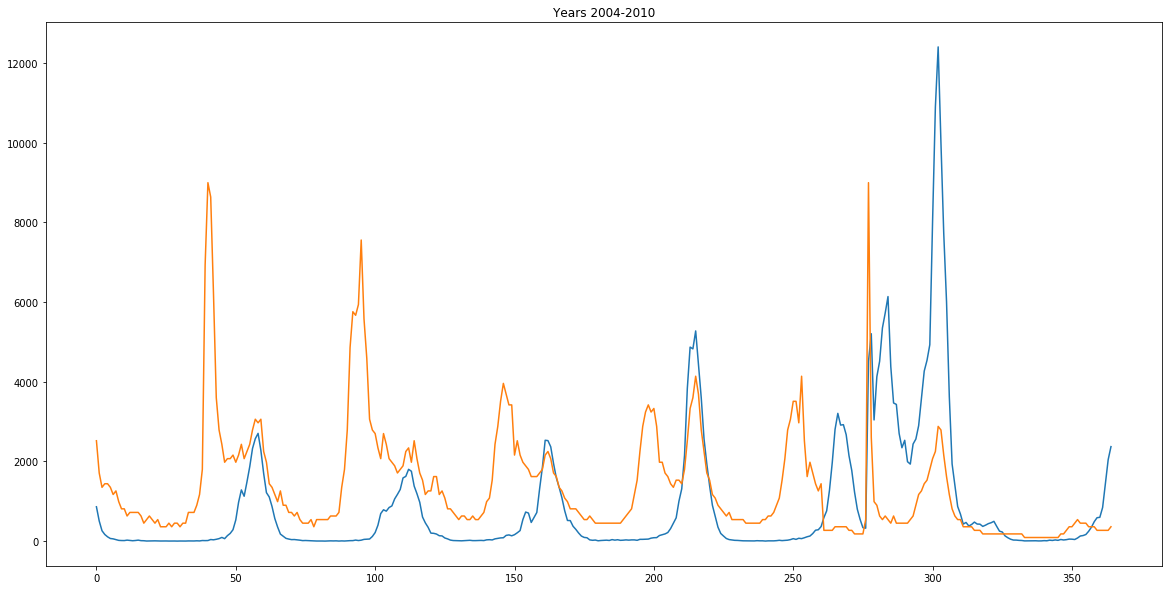

In [68]:
fig = plt.figure(figsize=(20,10))
y06 = data[data['YEAR']<=2010]
#y06 = y06[data['YEAR']!=2018]
y06['INFL']=y06['INFL']*90
x = np.arange(len(y06['total cases']))
plt.plot(x,y06['total cases'])
plt.plot(x,y06['INFL'])
plt.title('Years 2004-2010')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Years 2010-2013')

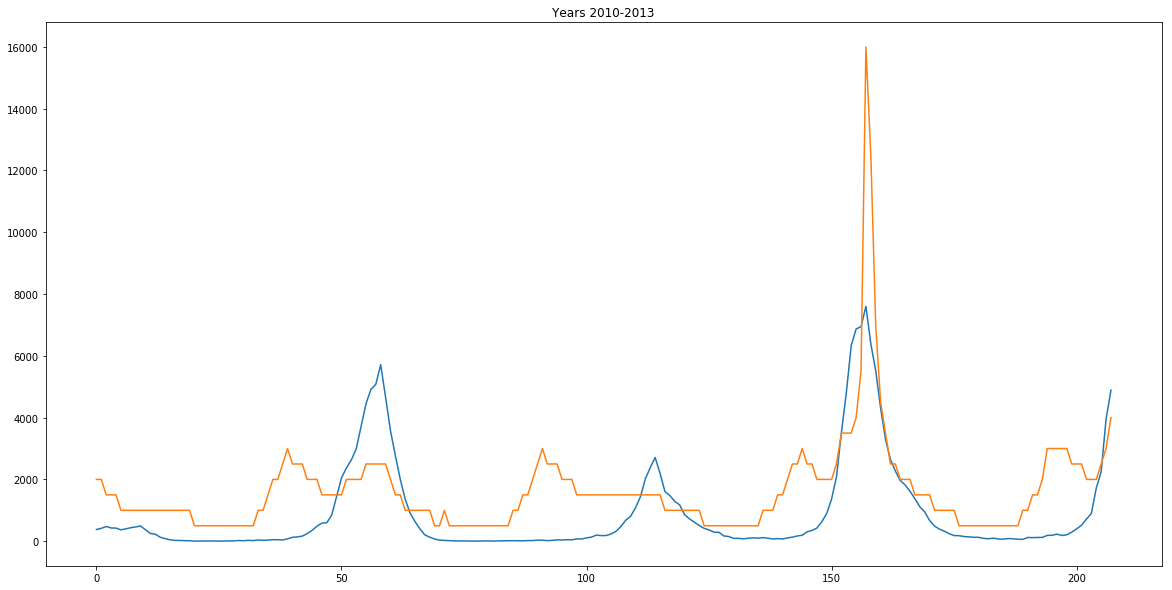

In [69]:
fig = plt.figure(figsize=(20,10))
y06 = data[data['YEAR']>=2010]
y06 = y06[data['YEAR']<=2013]
y06['INFL']=y06['INFL']*500
x = np.arange(len(y06['total cases']))
plt.plot(x,y06['total cases'])
plt.plot(x,y06['INFL'])
plt.title('Years 2010-2013')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Years 2013-2019')

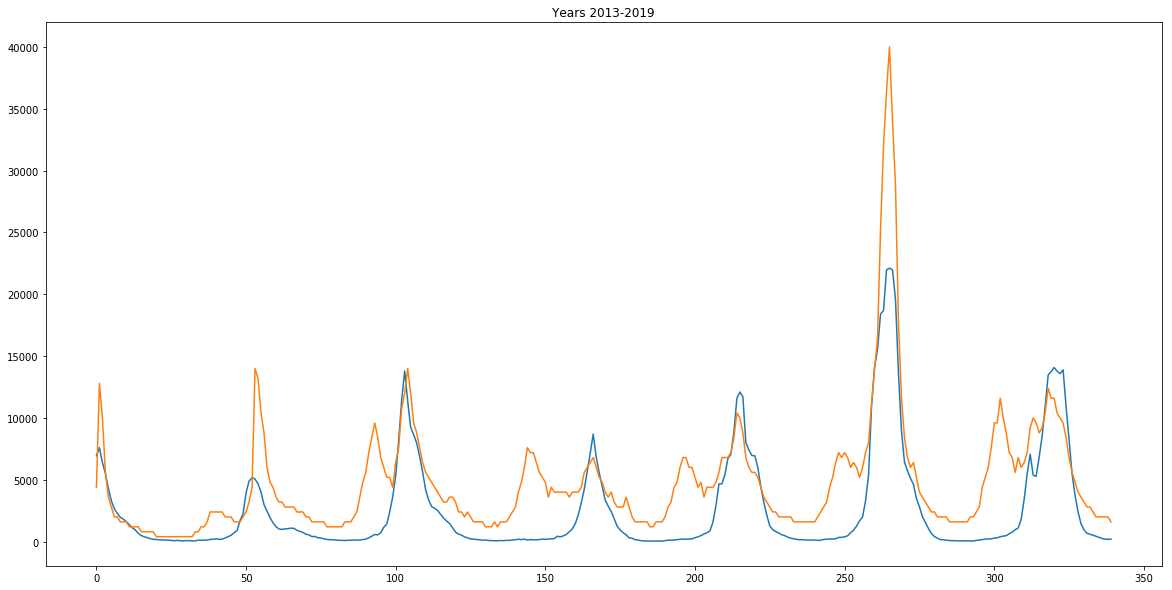

In [70]:
fig = plt.figure(figsize=(20,10))
y06 = data[data['YEAR']>=2013]
#y06 = y06[data['YEAR']<=2013]
y06['INFL']=y06['INFL']*400
x = np.arange(len(y06['total cases']))
plt.plot(x,y06['total cases'])
plt.plot(x,y06['INFL'])
plt.title('Years 2013-2019')

# Visualizing Data from 2004 to 2010

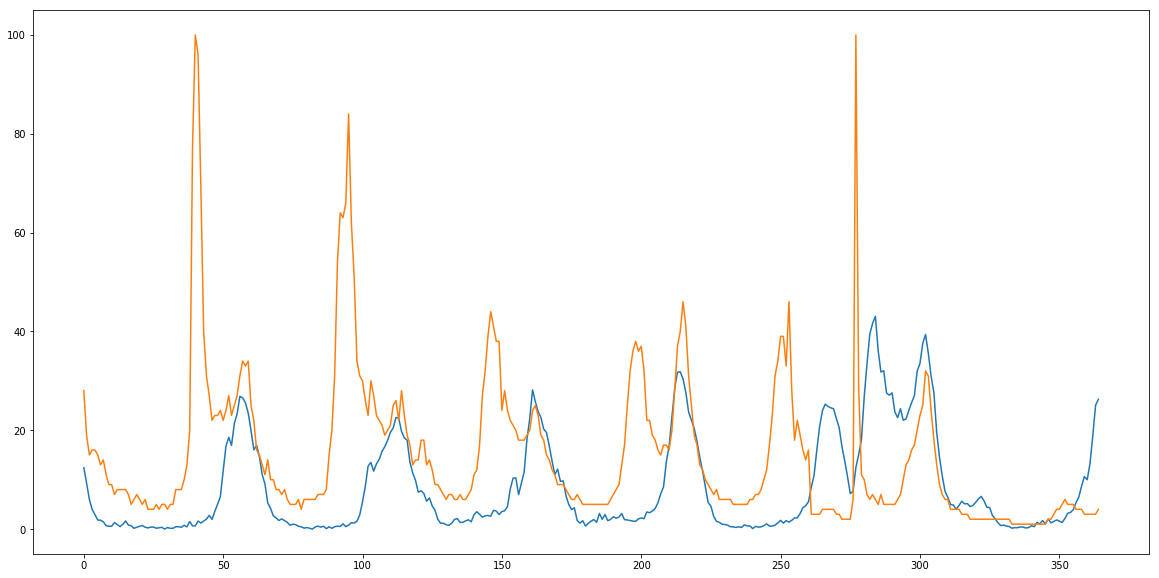

In [44]:
fig = plt.figure(figsize=(20,10))
y06 = data[data['YEAR']<=2010]
#y06 = y06[data['YEAR']!=2018]
x = np.arange(len(y06['PERCENT POSITIVE']))
plt.plot(x,y06['PERCENT POSITIVE'])
plt.plot(x,y06['INFL'])

# Visualizing Data from 2009 to 2019

Text(0.5, 1.0, 'Years 2009-2019')

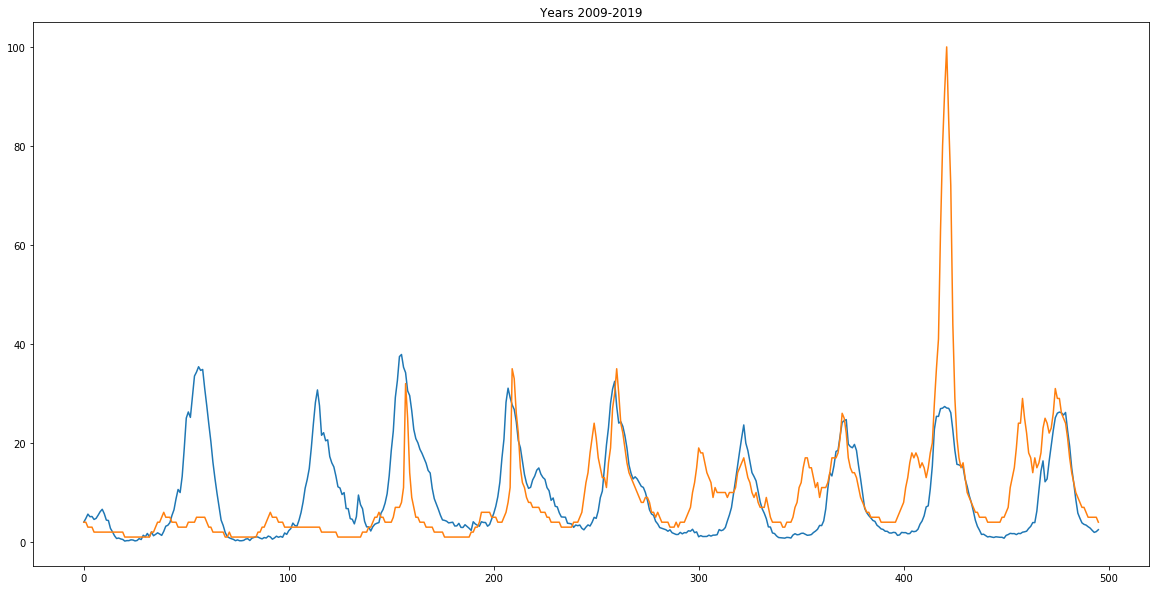

In [46]:
fig = plt.figure(figsize=(20,10))
y06 = data[data['YEAR']>2009]
#y06 = y06[data['YEAR']!=2017]
x = np.arange(len(y06['PERCENT POSITIVE']))
plt.plot(x,y06['PERCENT POSITIVE'])
plt.plot(x,y06['INFL'])
plt.title('Years 2009-2019')

# Visualizing Data from 2010 to 2013

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Years 2010-2013')

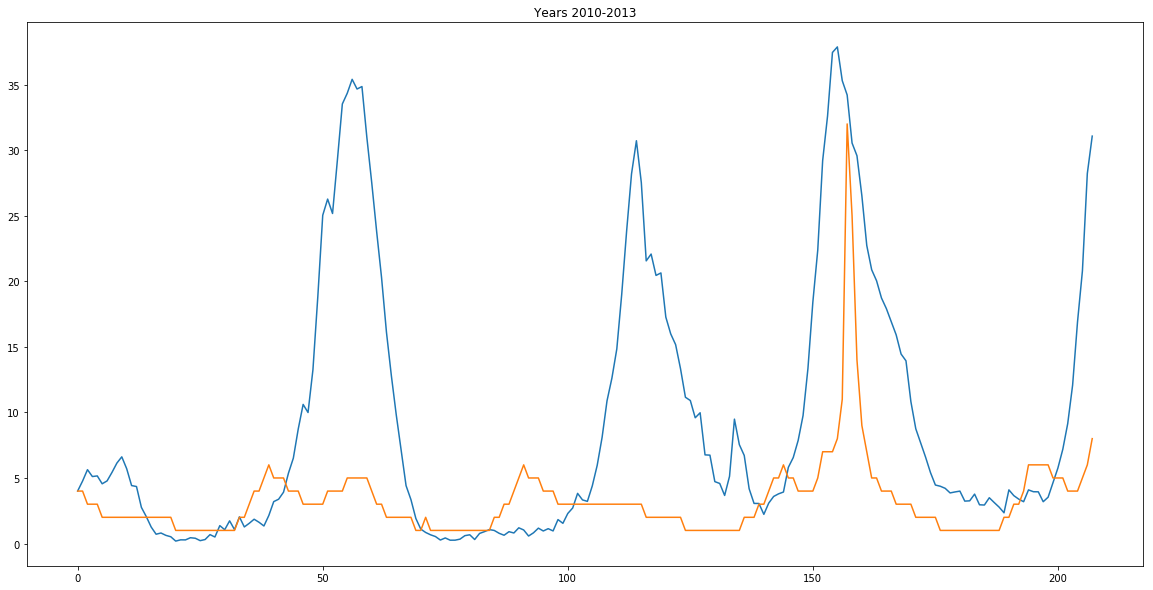

In [47]:
fig = plt.figure(figsize=(20,10))
y06 = data[data['YEAR']>=2010]
y06 = y06[data['YEAR']<=2013]
x = np.arange(len(y06['PERCENT POSITIVE']))
plt.plot(x,y06['PERCENT POSITIVE'])
plt.plot(x,y06['INFL'])
plt.title('Years 2010-2013')

# Visualizing Data from 2013 to 2019

Text(0.5, 1.0, 'Years 2013-2019')

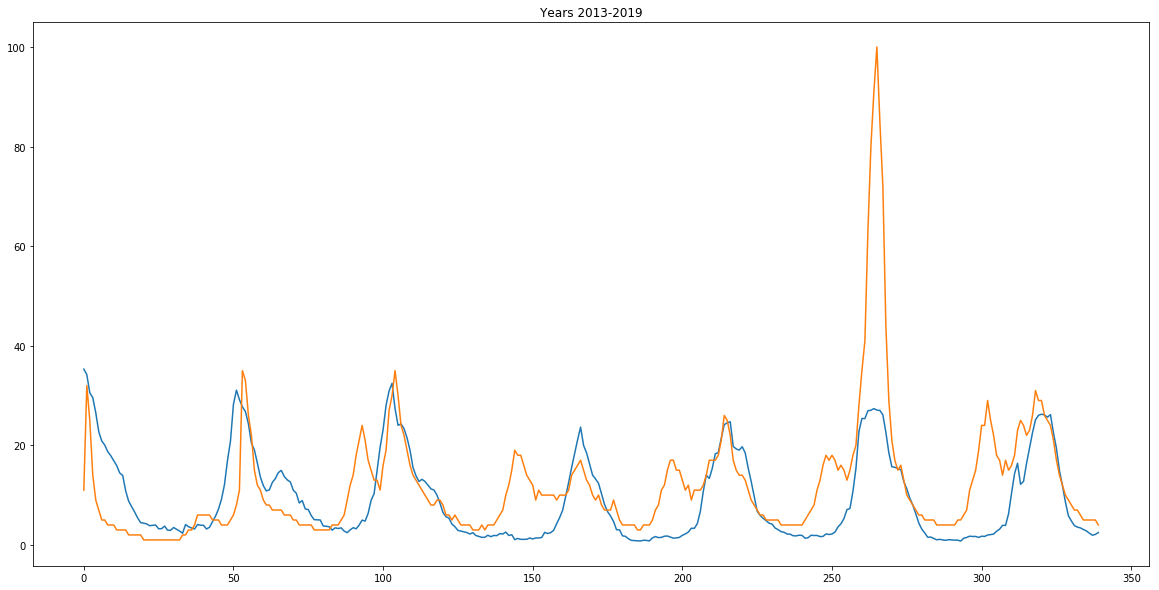

In [48]:
fig = plt.figure(figsize=(20,10))
y06 = data[data['YEAR']>=2013]
#y06 = y06[data['YEAR']!=2018]
x = np.arange(len(y06['PERCENT POSITIVE']))
plt.plot(x,y06['PERCENT POSITIVE'])
plt.plot(x,y06['INFL'])
plt.title('Years 2013-2019')

# Visualizing Data from 2009 to 2019, excluding 2018

This cell is not good to base any judgement off of. While it removes everything of the year of 2018, note that it does not remove any of 2017, so it doesn't accurately get rid of the 2017-2018 data, and it interferes with the 2018-2019 season as well.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Years 2013-2019, not including 2018')

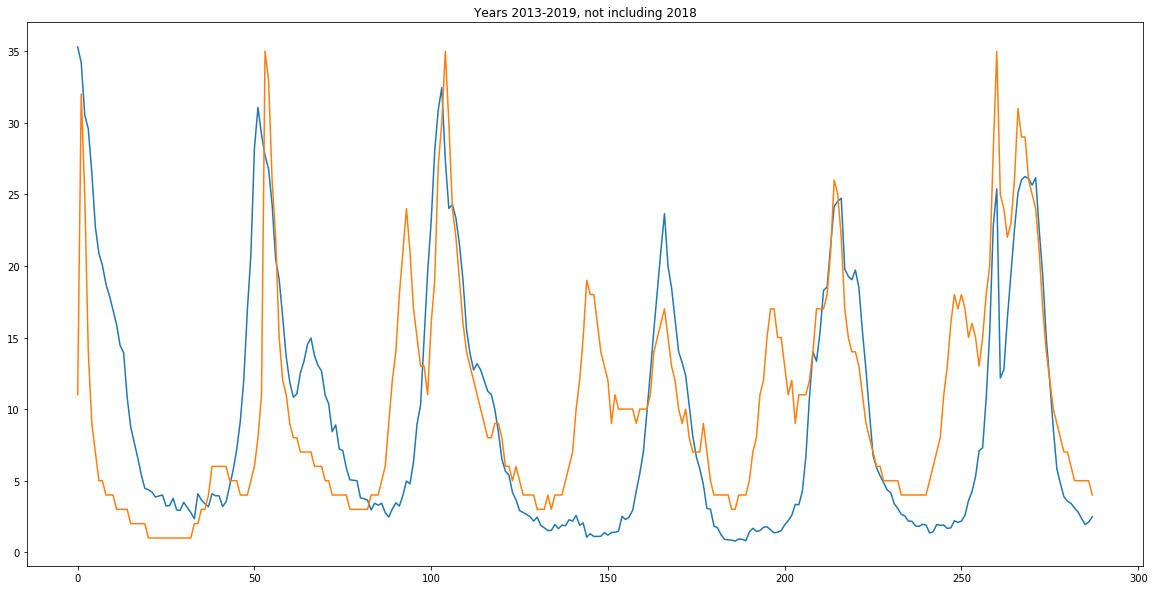

In [49]:
fig = plt.figure(figsize=(20,10))
y06 = data[data['YEAR']>=2013]
y06 = y06[data['YEAR']!=2018]
x = np.arange(len(y06['PERCENT POSITIVE']))
plt.plot(x,y06['PERCENT POSITIVE'])
plt.plot(x,y06['INFL'])
plt.title('Years 2013-2019, not including 2018')